<a href="https://colab.research.google.com/github/kangand/1000ml/blob/master/Assignment_7/Draft_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testing image classification at a basic level with smaller image dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.facecolor']='w'
plt.rcParams['figure.edgecolor']='w'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import os

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [5]:
import torch

from fastai.vision import get_transforms
from fastai.vision.data import ImageList
from fastai.vision import defaults
from fastai.metrics import error_rate, accuracy
from fastai.vision.learner import create_cnn, cnn_learner
from fastai.vision.models import resnet34, vgg16_bn, squeezenet1_0, densenet121, alexnet
from fastai.widgets import *

In [6]:
path = '/content/Drive/My Drive/jewelery_images'

In [7]:
tfms = get_transforms(do_flip=False)

In [8]:
data = (ImageList.from_folder(path)
  .split_by_rand_pct()
  .label_from_folder()
  .transform(tfms,size=64)
  .databunch())

In [9]:
data.batch_size

64

In [10]:
learn = create_cnn(data, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [11]:
defaults.device = torch.device('cuda')

In [12]:
%%time

learn.fit_one_cycle(4)



epoch,train_loss,valid_loss,accuracy,time
0,1.726552,0.809660,0.724590,02:56
1,1.298537,0.714773,0.777049,01:07
2,1.050678,0.561227,0.800000,01:08
3,0.868808,0.547663,0.800000,01:08


CPU times: user 3min 37s, sys: 2.77 s, total: 3min 40s
Wall time: 6min 20s


In [15]:
interp = ClassificationInterpretation.from_learner(learn)

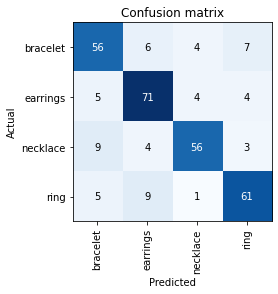

In [16]:
interp.plot_confusion_matrix()

In [17]:
# cnn with other models

learn2 = create_cnn(data, vgg16_bn, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth


In [18]:
%%time

learn2.fit_one_cycle(4)



epoch,train_loss,valid_loss,accuracy,time
0,1.533751,0.624276,0.783607,02:45
1,1.082664,0.609265,0.800000,02:44
2,0.841984,0.536054,0.832787,02:48
3,0.688128,0.522653,0.842623,02:45


CPU times: user 10min 13s, sys: 9.16 s, total: 10min 22s
Wall time: 11min 3s


In [19]:
interp2 = ClassificationInterpretation.from_learner(learn2)

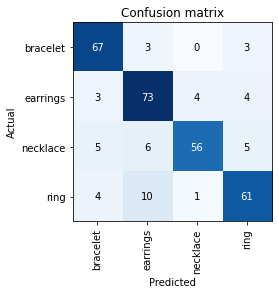

In [20]:
interp2.plot_confusion_matrix()

In [21]:
%%time

learn3 = create_cnn(data, squeezenet1_0, metrics=accuracy)

learn3.fit_one_cycle(4)

Downloading: "https://download.pytorch.org/models/squeezenet1_0-a815701f.pth" to /root/.cache/torch/checkpoints/squeezenet1_0-a815701f.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.534174,0.567635,0.832787,00:36
1,1.057778,0.628329,0.852459,00:36
2,0.814378,0.446279,0.881967,00:36
3,0.664351,0.435692,0.881967,00:37


CPU times: user 35.7 s, sys: 1.79 s, total: 37.5 s
Wall time: 2min 28s


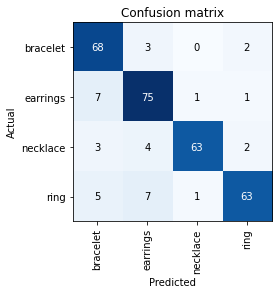

In [22]:
interp3 = ClassificationInterpretation.from_learner(learn3)
interp3.plot_confusion_matrix()

In [23]:
%%time

learn4 = create_cnn(data, densenet121, metrics=accuracy)

learn4.fit_one_cycle(4)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/checkpoints/densenet121-a639ec97.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.377058,0.682910,0.740984,01:36
1,0.874449,0.645312,0.803279,01:32
2,0.659014,0.558633,0.813115,01:34
3,0.502410,0.505275,0.836066,01:32


CPU times: user 5min 24s, sys: 10.5 s, total: 5min 35s
Wall time: 6min 17s


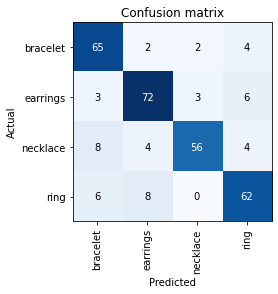

In [24]:
interp4 = ClassificationInterpretation.from_learner(learn4)
interp4.plot_confusion_matrix()

In [25]:
%%time

learn5 = create_cnn(data, alexnet, metrics=accuracy)

learn5.fit_one_cycle(4)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.731746,0.845081,0.727869,00:33
1,1.260460,0.773327,0.786885,00:33
2,1.015143,0.722015,0.790164,00:33
3,0.893541,0.707160,0.806557,00:32


CPU times: user 21.1 s, sys: 1.85 s, total: 23 s
Wall time: 2min 19s


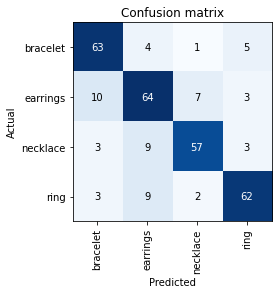

In [26]:
interp5 = ClassificationInterpretation.from_learner(learn5)
interp5.plot_confusion_matrix()

Further testing on best performing models.

In [ ]:
from fastai.vision.models import squeezenet1_1, vgg19_bn

In [ ]:
%%time

learn6 = create_cnn(data, squeezenet1_1, metrics=accuracy)
learn6.fit_one_cycle(4)

In [ ]:
%%time

learn7 = create_cnn(data, vgg19_bn, metrics=accuracy)
learn7.fit_one_cycle(4)